<a href="https://colab.research.google.com/github/Avik-G/YES-Bank-Stock-Price-Analyis/blob/main/YES_Bank_Stock_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YES BANK**


In [1]:
# Importing Required Library

import numpy as np                                     # numerical computations
from numpy import math
import pandas as pd                                    # data manipulations

import matplotlib.pyplot as plt                        # vizualization with plots
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px

from datetime import datetime                          # to convert to date
from statsmodels.tsa.arima_model import ARIMA          # to build ARIMA

from dateutil.relativedelta import relativedelta       # working with dates with style
from datetime import datetime                          # computational cost
from scipy.optimize import minimize                    # for function minimization
import copy                                            # create copies

from sklearn.preprocessing import (MinMaxScaler,       # scale the data
StandardScaler)
from sklearn.model_selection import train_test_split   # split train and test data
from sklearn.model_selection import (cross_val_score,  # split train and test data on a timeseries
TimeSeriesSplit)

from sklearn.linear_model import LinearRegression      # regression model
from xgboost import XGBRegressor                       # xgboost model
from sklearn.ensemble import RandomForestRegressor     # random forest model
from sklearn.svm import SVR                            # support vector regressor
from sklearn.linear_model import (Lasso, Ridge,        # regularization
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV       # grid search to optimize parameters

from sklearn.metrics import (r2_score,                 # import required metrics
mean_squared_error,  mean_absolute_percentage_error,
mean_absolute_error)

from statsmodels.tsa.stattools import adfuller         # statistics and econometrics
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.stats import zscore

import warnings                                        # do not disturb mode
warnings.filterwarnings('ignore')

<ipython-input-1-d82ca9e06065>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
data = pd.read_csv('/content/drive/MyDrive/DS/ML_Regression/data_YesBank_StockPrices.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [4]:
data.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Data Exploration

In [5]:
data.shape

(185, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


- There are no Null values in the dataset.
- The Date column Dtype needs to be changed from object to datetime

In [7]:
# Changing DATE from object to datetime
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [8]:
# Observing all mathemetical forms for given data
data.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,2005-07-01 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
first,2005-07-01 00:00:00,NaN,NaN,NaN,NaN
last,2020-11-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000


In [9]:
# Checking for Null value
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [10]:
# Checking for Duplicates
len(data[data.duplicated()])

0

- There are no duplicates in the dataset

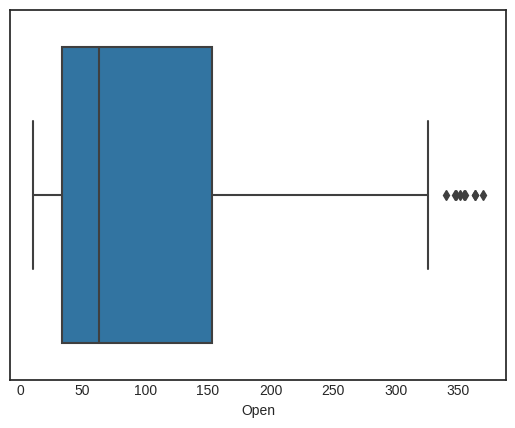

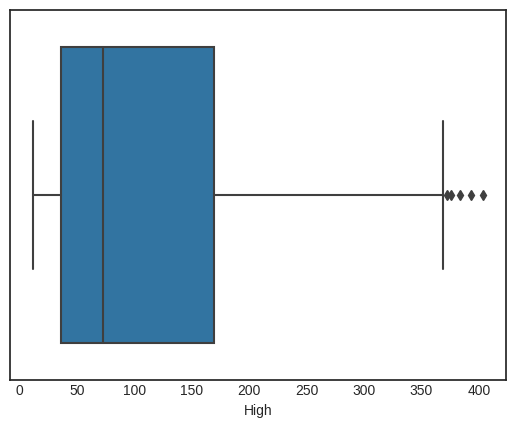

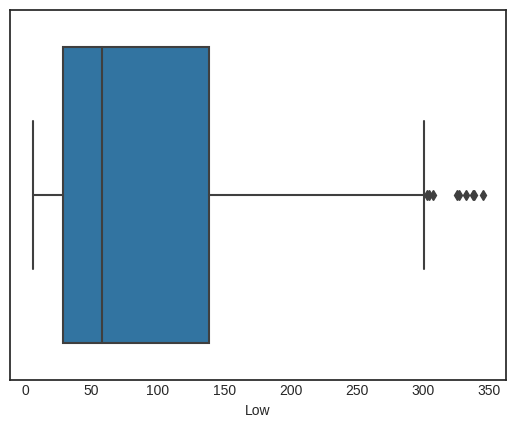

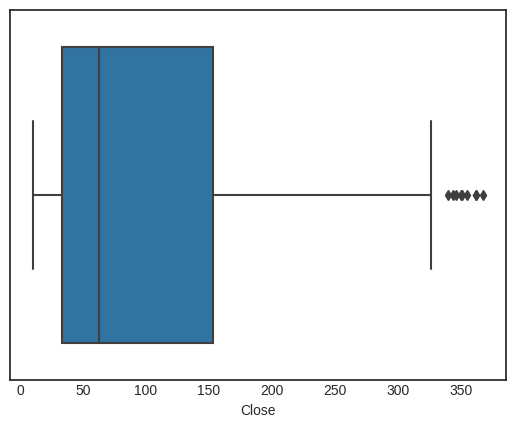

In [11]:
# Creating Box Plots to check all quartiles and outliers for the columns in our data set
plots_count_columns=['Open','High','Low','Close']
for plots in plots_count_columns:
    sns.boxplot(x=plots, data=data)
    plt.show()

In [12]:
# Identifying Numerical Columns
numerical_col = data.describe().columns
numerical_col

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

### Exploratory Data Analysis

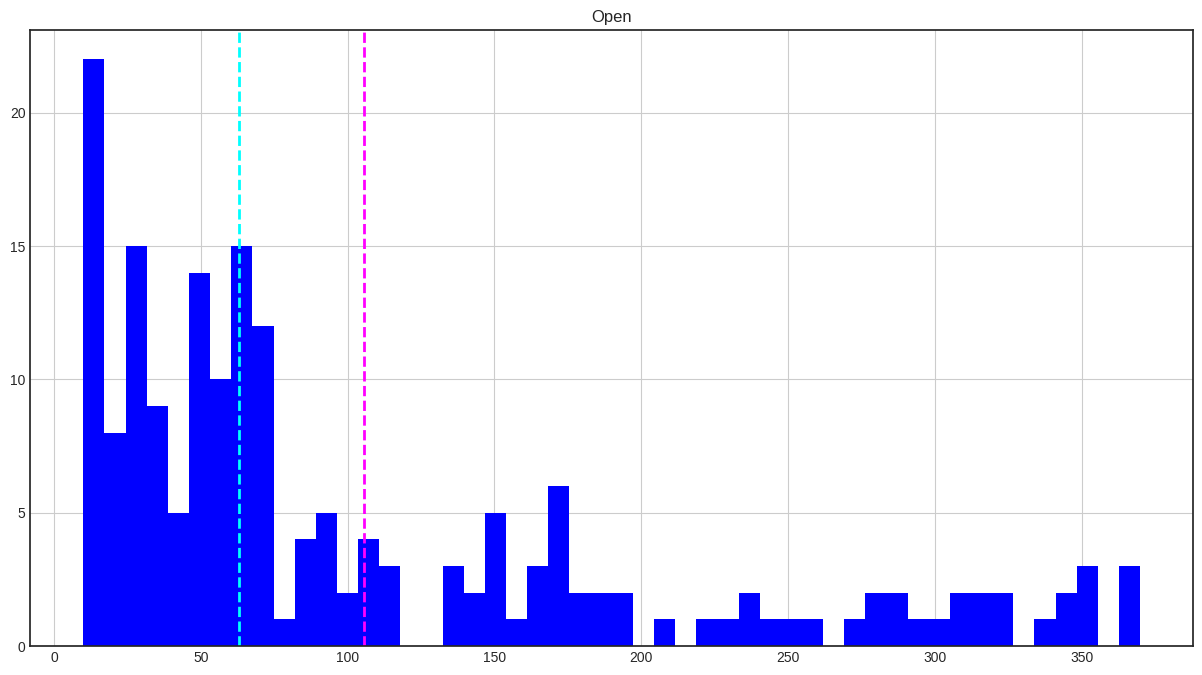

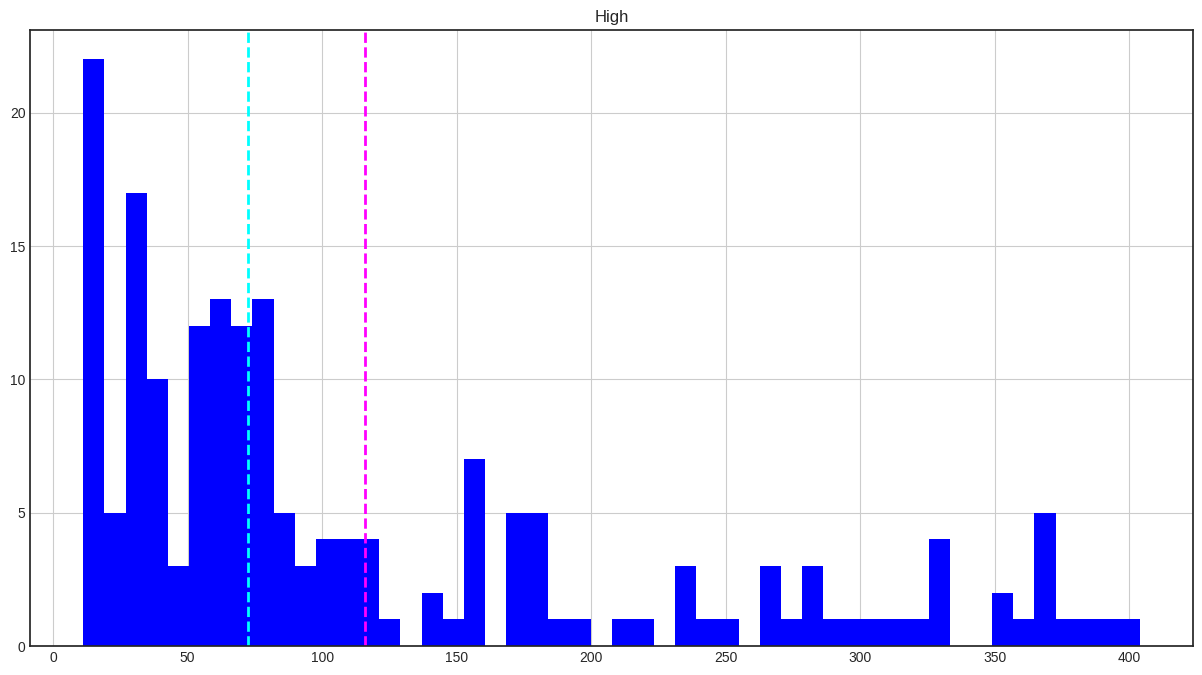

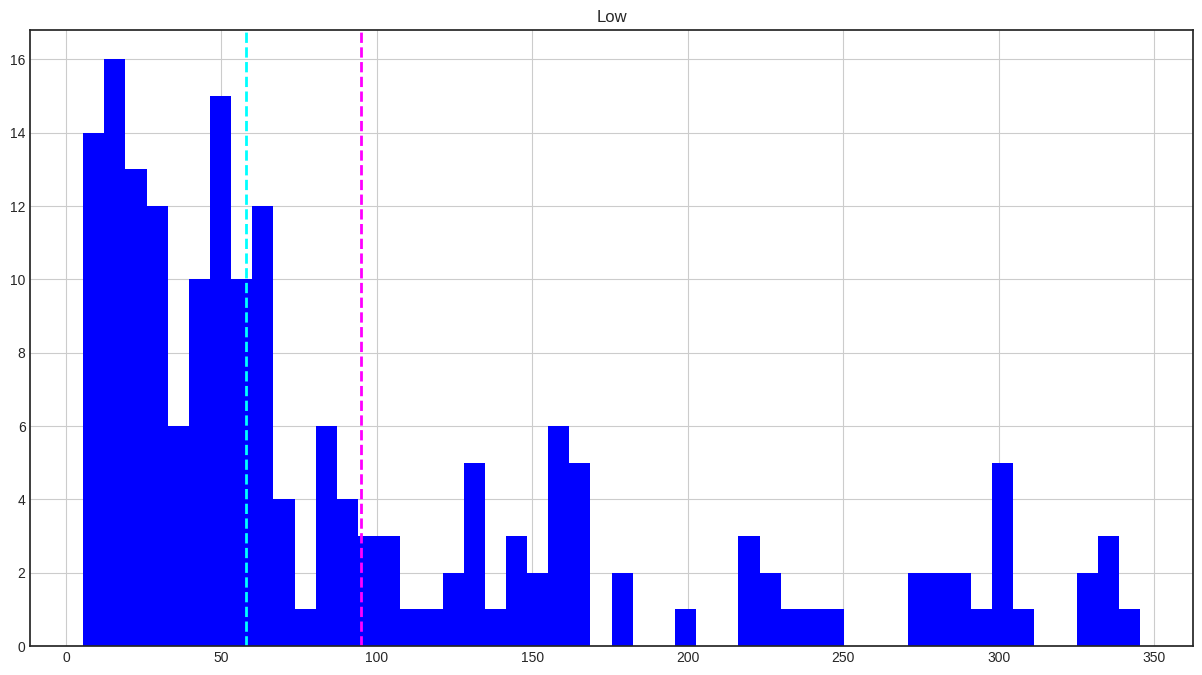

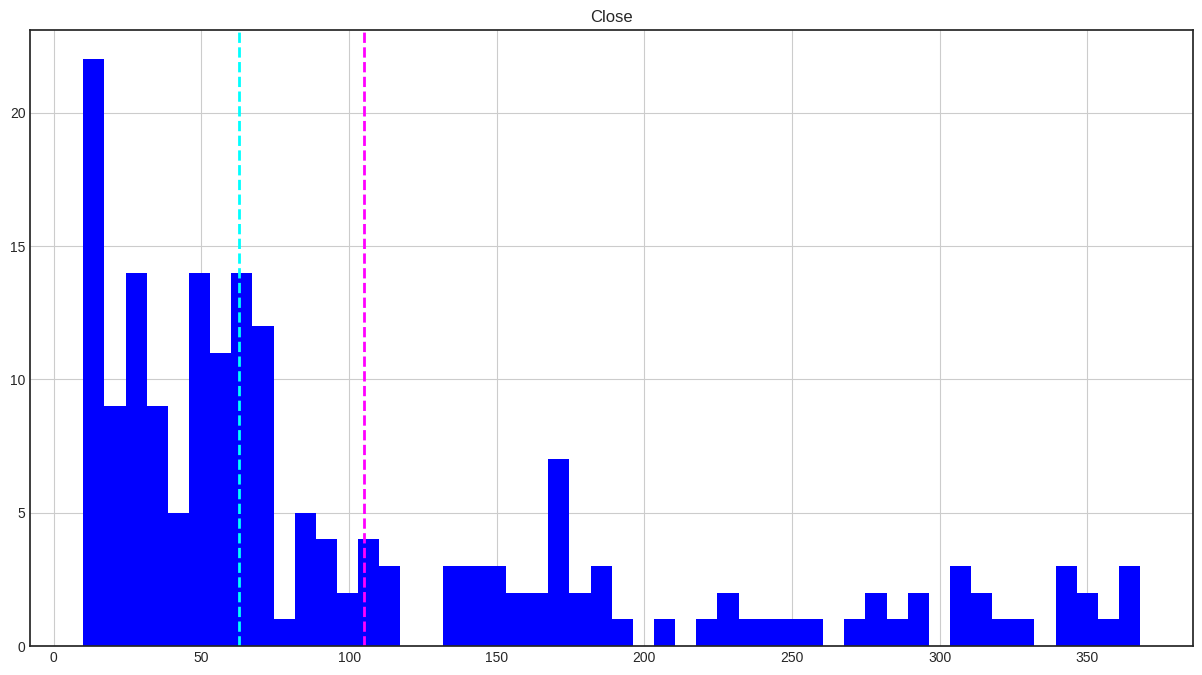

In [13]:
# Plot to check the Data Distribution, Mean and Median of each single Indpendent variable
for i in numerical_col[:]:
  fig = plt.figure(figsize=(15,8))
  ax = fig.gca()
  features = data[i]
  label = data['Close']
  features.hist(bins = 50,ax = ax,color = 'blue')
  ax.axvline(features.mean(),color = 'magenta',linestyle = 'dashed',linewidth = 2)
  ax.axvline(features.median(),color = 'cyan',linestyle = 'dashed',linewidth = 2)
  ax.set_title(i)

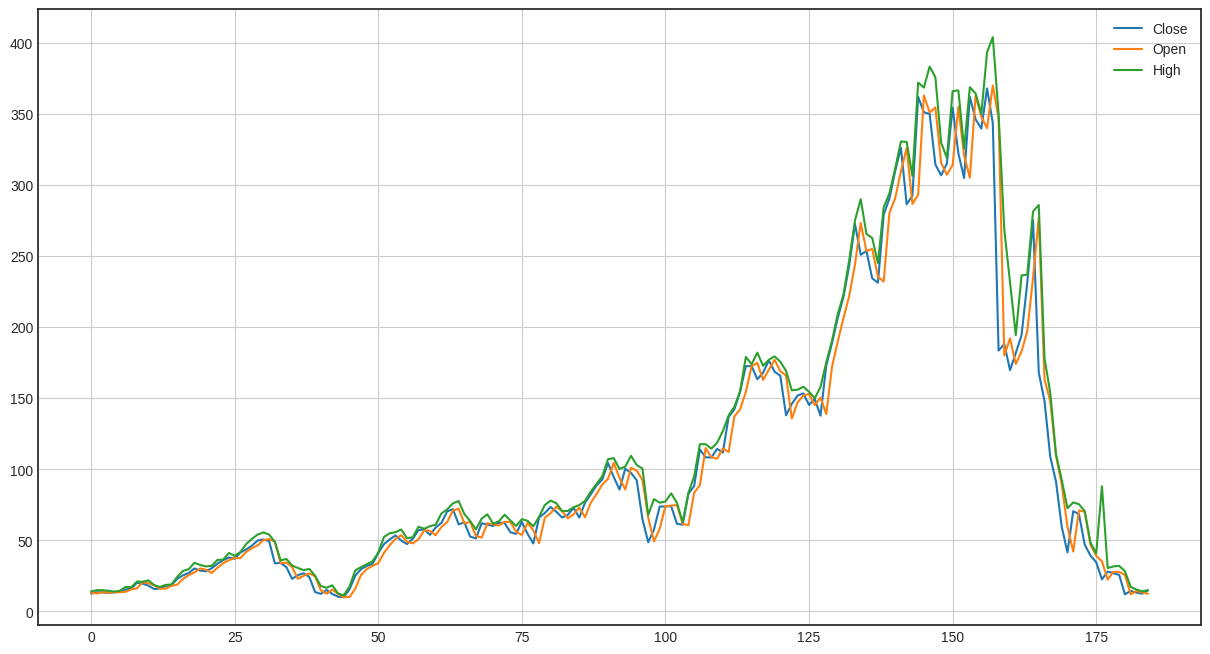

In [14]:
# Line Plot to check the movement of Open, Close and High
plt.figure(figsize=(15,8))
plt.plot(data['Close'])
plt.plot(data['Open'])
plt.plot(data['High'])
plt.legend(['Close','Open','High'])
plt.grid()


We can conclude that data is not normally distributed as mean is higher than median in all features. By using logarithmic transformation, we have to convert our columns into normal distribution dataset.

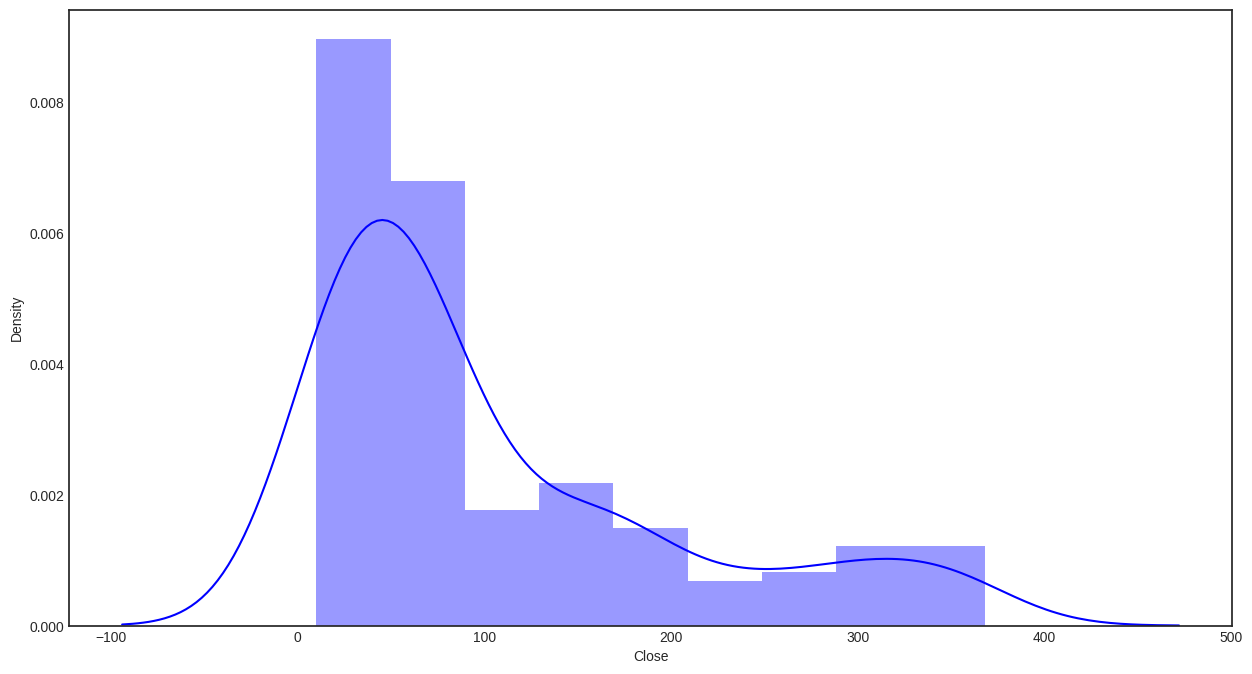

In [15]:
# Checking the distribution of Dependent Variable i.e. Close Column
plt.figure(figsize=(15,8))
sns.distplot(data['Close'],color='blue')
plt.show()

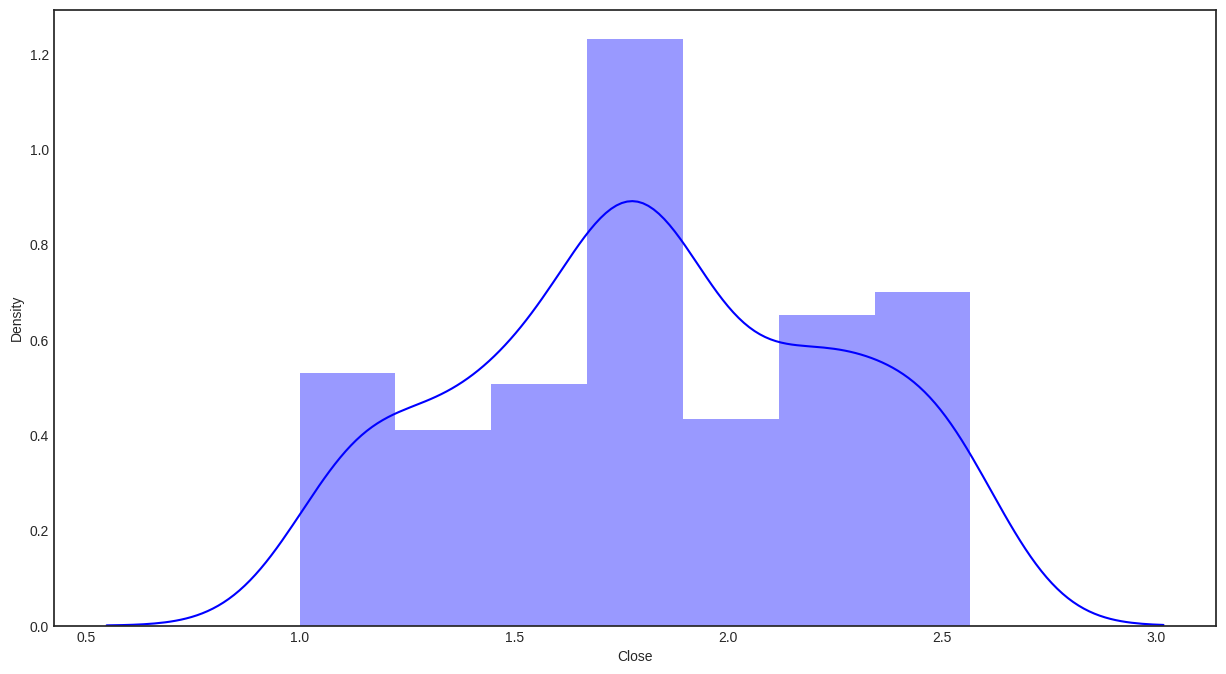

In [16]:
# Normal Distribution Plot for Close Column
plt.figure(figsize=(15,8))
sns.distplot(np.log10(data['Close']),color='blue')
plt.show()

<Axes: xlabel='Low', ylabel='Density'>

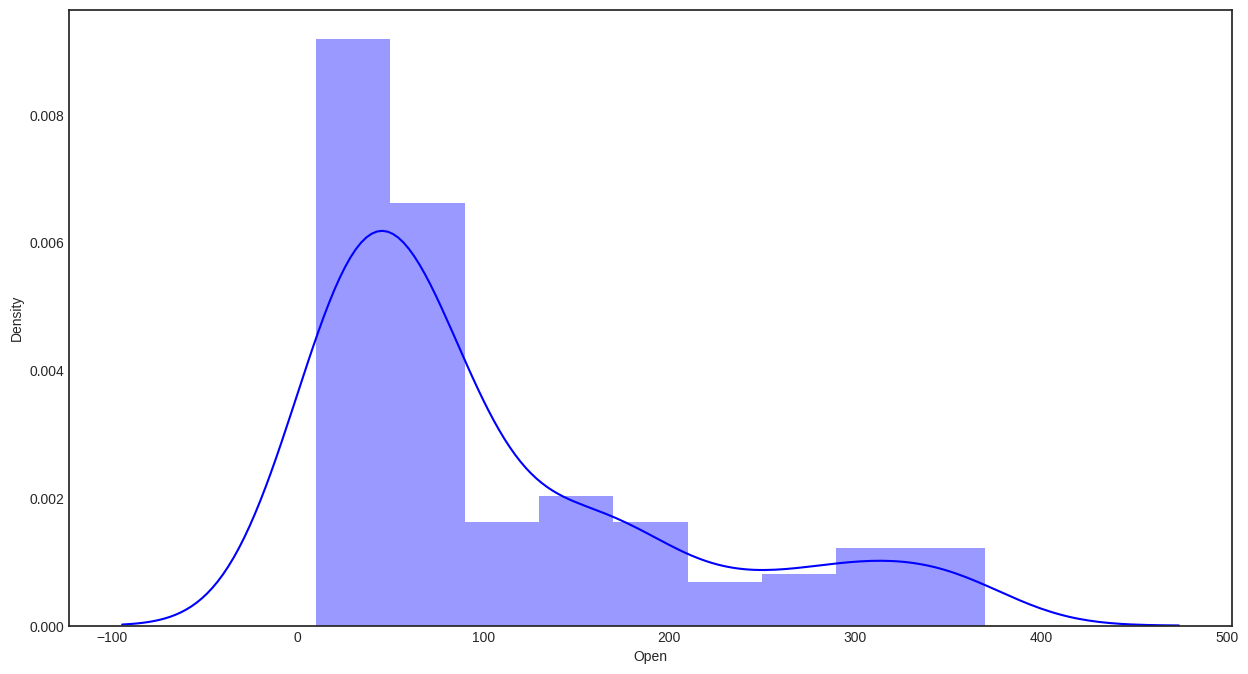

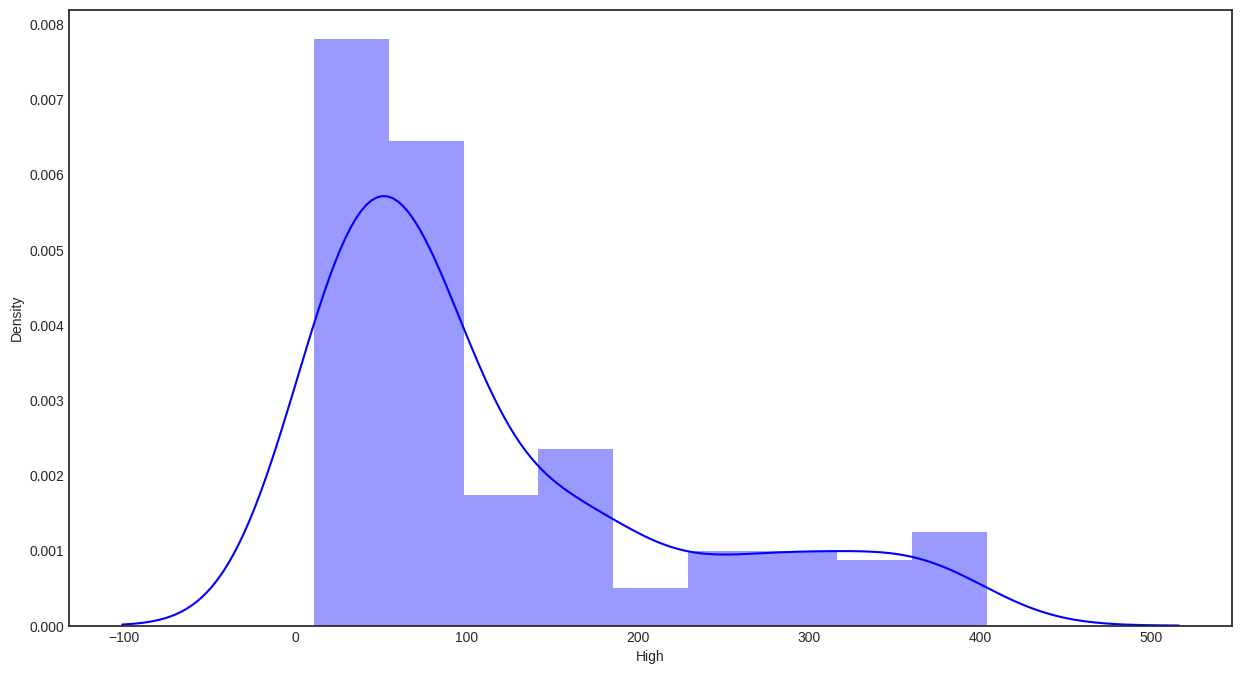

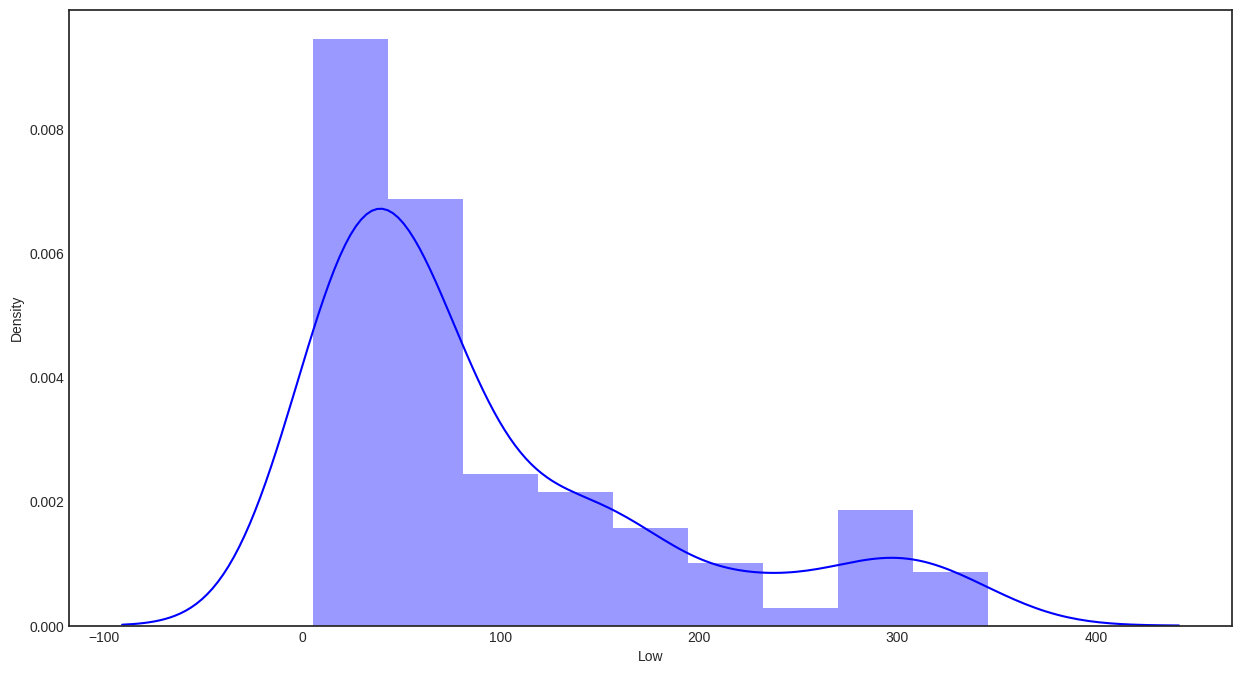

In [17]:
# Distribution Plots for all Independent variables
plt.figure(figsize=(15,8))
sns.distplot(data['Open'], color='blue')

plt.figure(figsize=(15,8))
sns.distplot(data['High'], color='blue')

plt.figure(figsize=(15,8))
sns.distplot(data['Low'], color='blue')

<Axes: xlabel='Low', ylabel='Density'>

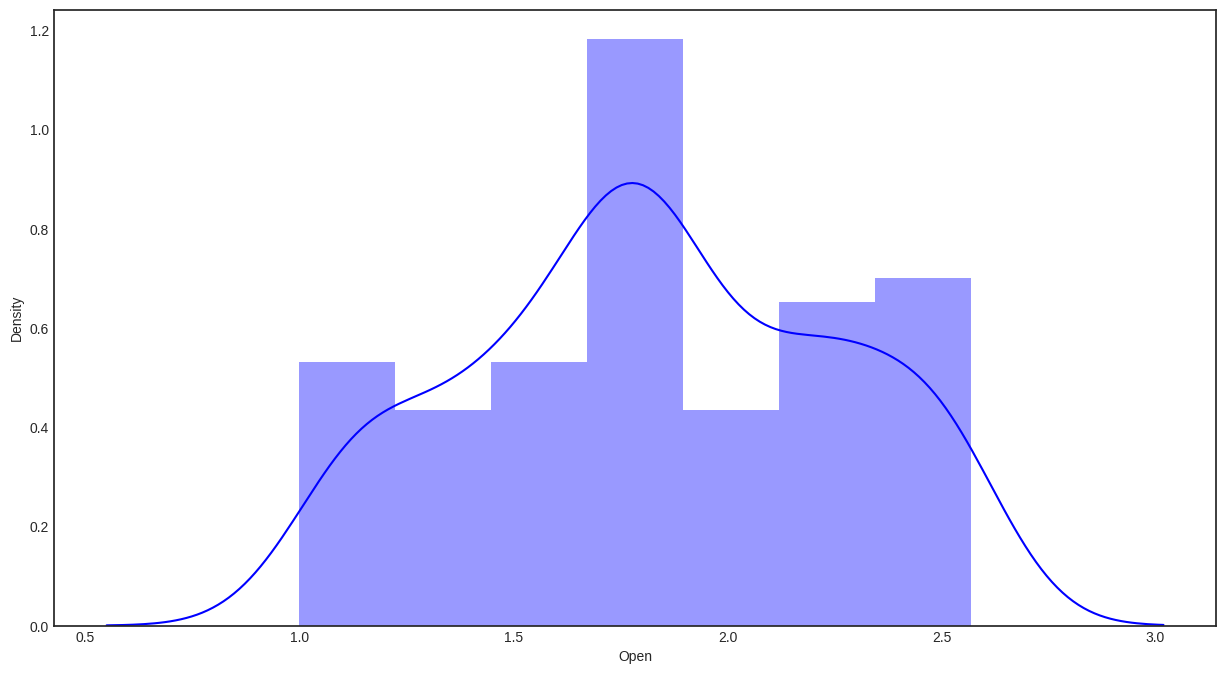

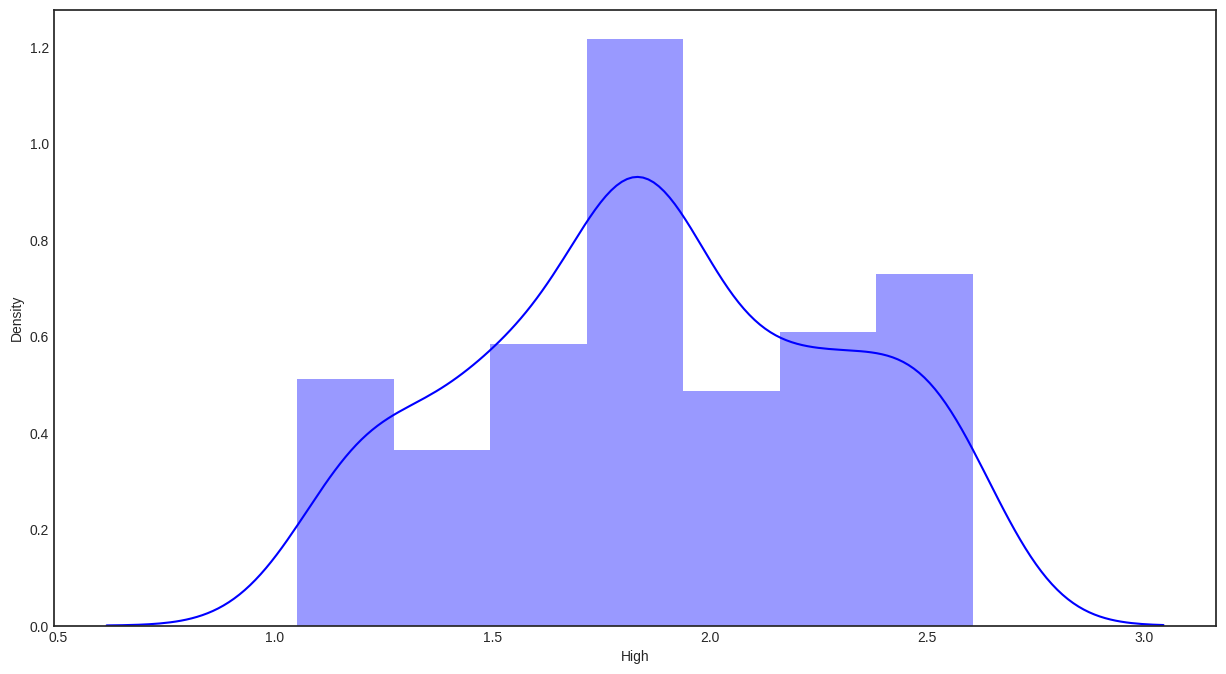

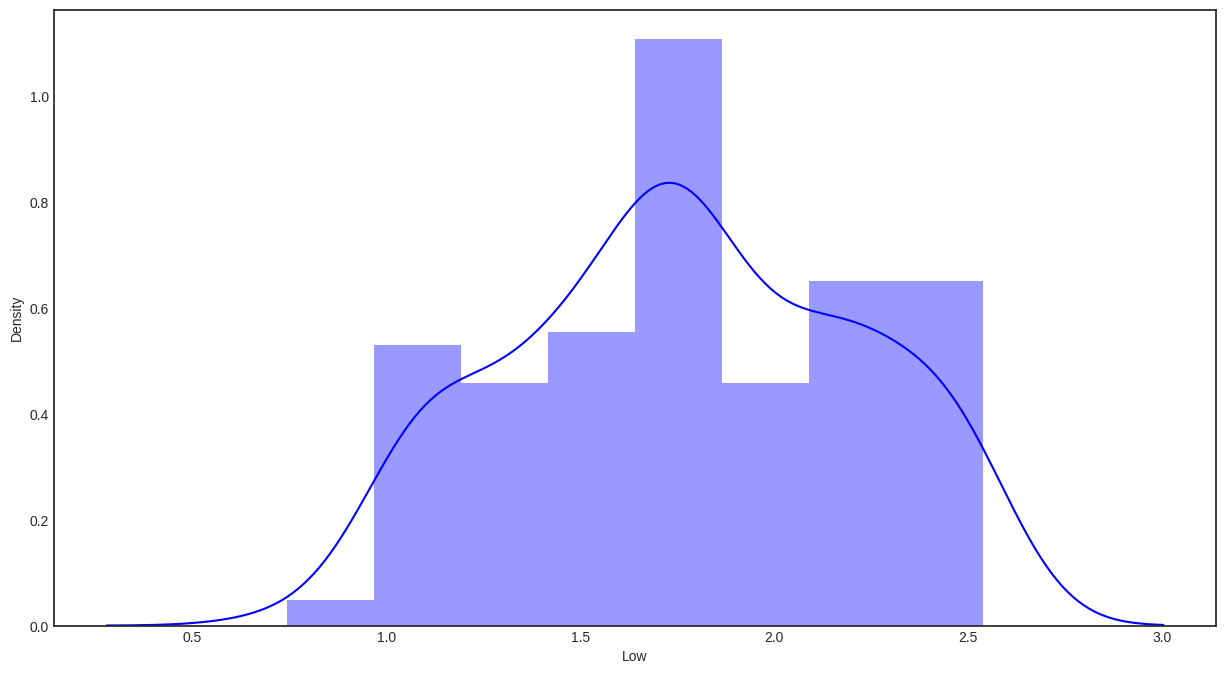

In [18]:
# Normal Distribution for all Independent Variables

plt.figure(figsize=(15,8))
sns.distplot(np.log10(data['Open']), color='blue')

plt.figure(figsize=(15,8))
sns.distplot(np.log10(data['High']), color='blue')

plt.figure(figsize=(15,8))
sns.distplot(np.log10(data['Low']), color='blue')

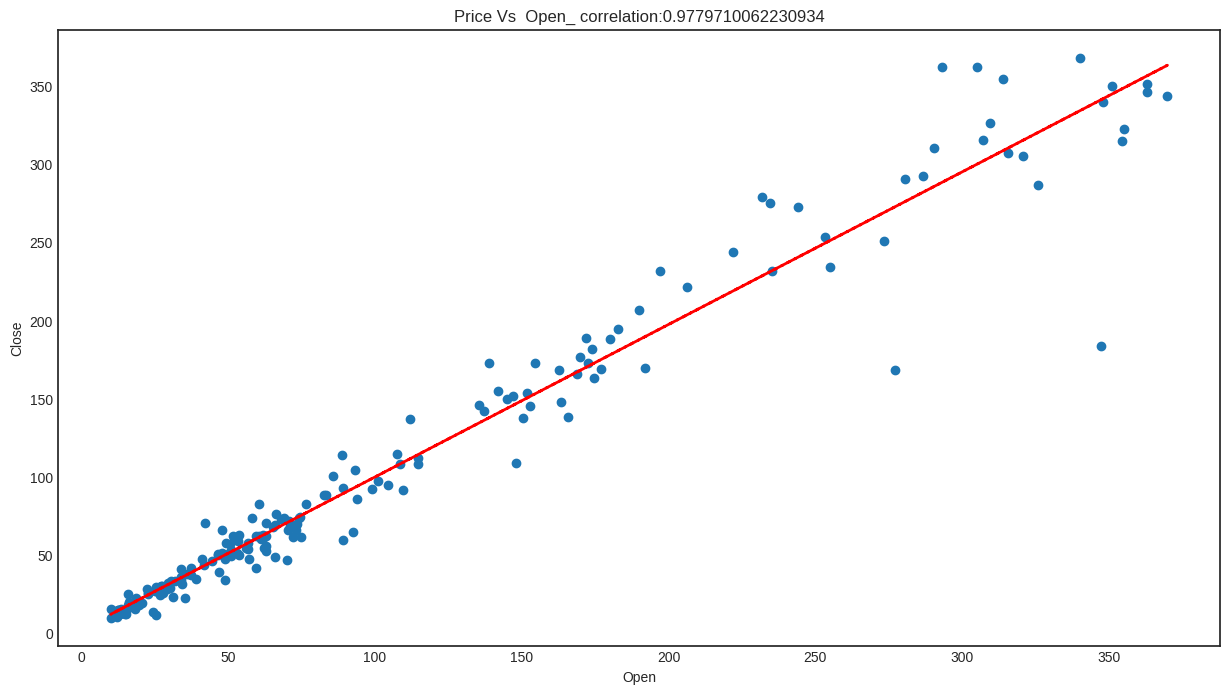

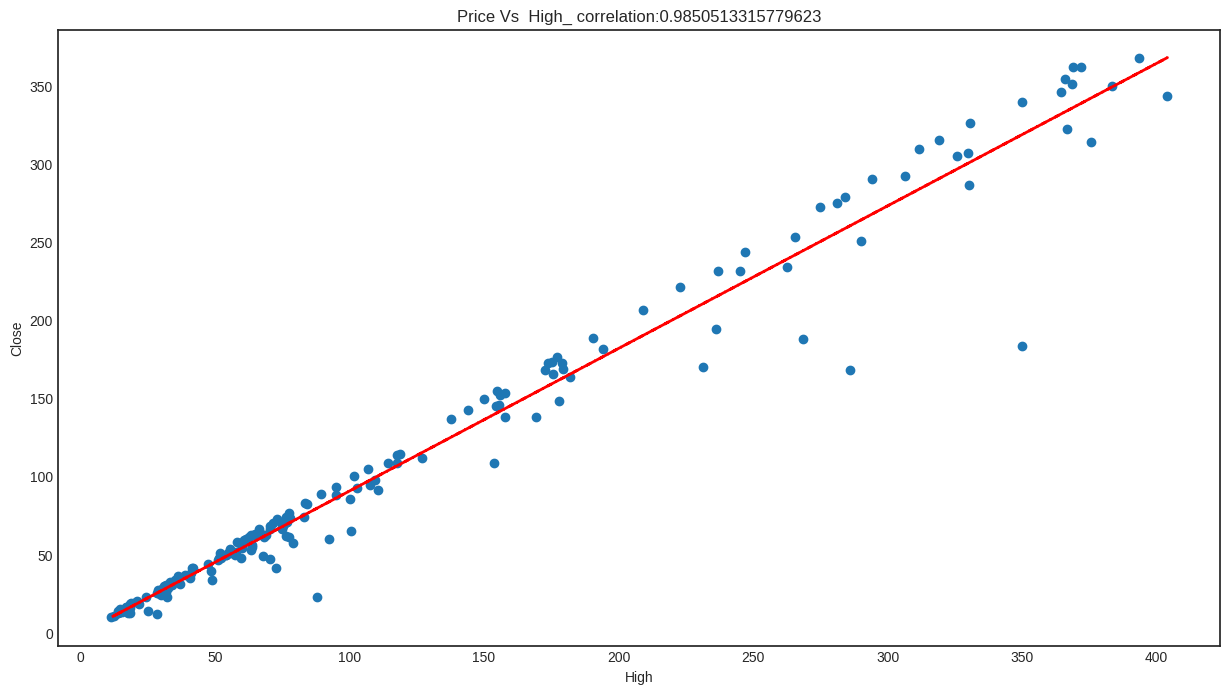

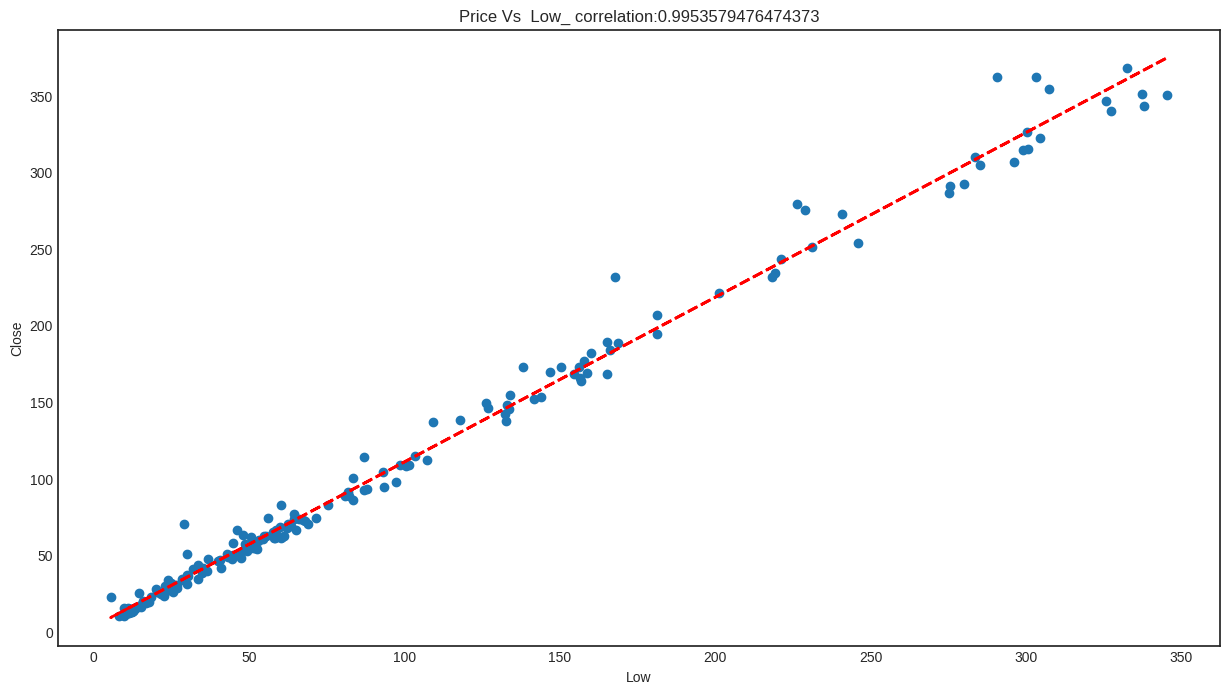

In [19]:
# Corelation between variables

for col in numerical_col[:-1]:
  fig = plt.figure(figsize = (15,8))
  ax = fig.gca()
  features = data[col]
  label = data['Close']
  correlation = features.corr(label)
  plt.scatter(x = features,y = label)
  plt.xlabel(col)
  plt.ylabel('Close')
  plt.title('Price Vs  ' + col + '_ correlation:' + str(correlation))
  z = np.polyfit(data[col],data['Close'],1)
  y_hat = np.poly1d(z)(data[col])
  plt.plot(data[col] , y_hat, "r--",lw = 2)
plt.show()


**Bivariate analysis showed high correlation of close price with other features.**

We can't remove any variables from our date because each of the variables are important for our model.

<Axes: >

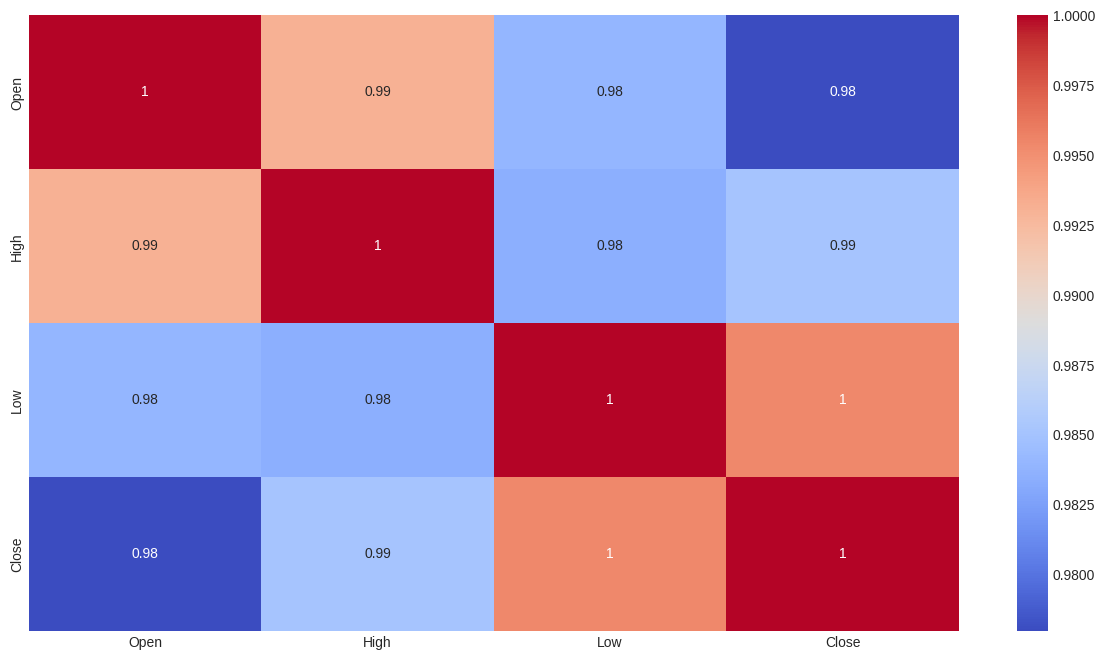

In [20]:
# Correaltion Between the Variables
corr = data.corr()
plt.figure(figsize = (15,8))
sns.heatmap(abs(corr),annot = True,cmap = 'coolwarm')

**Every feature is extremely corelated with each other, so taking just one feature or average of these features would suffice for our regression model as linear regression assumes there is no multi colinearity in the features**

### Feature Engineering

In [21]:
# Normalizing
# Splitting our data into Dependent and Independent Variables
X = data.drop(columns=['Close','Date']).apply(zscore)
y = np.log10(data['Close'])

In [22]:
# Creating Testing and Training Datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(148, 3)
(37, 3)
(148,)
(37,)


**We will build four models**

**Linear Regression** :-Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis.Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression.

**Lasso** :-Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

**Ridge**:-Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.

**Elastic Net** :-Elastic net is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions. ... Elastic Net is an extension of linear regression that adds regularization penalties to the loss function during training.

**Cross-validation** :-It is a resampling procedure used to evaluate machine learning models on a limited data sample. Basically Cross Validation is a technique using which Model is evaluated on the dataset on which it is not trained i.e. it can be a test data or can be another set as per availability or feasibility.

# **Linear Regression**

In [24]:
reg = LinearRegression()
reg_model = reg.fit(X_train,y_train)

In [25]:
reg.score(X_train,y_train)

0.8146653424416905

In [26]:
reg.intercept_

1.8292785179315048

In [27]:
reg.coef_

array([-0.04654099,  0.19795929,  0.23173905])

In [28]:
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

Evaluation Matrices

In [29]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_test_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE :",mean_absolute_error(y_test, y_test_pred))
print("R2 :",r2_score(y_test, y_test_pred))

MSE : 0.03158251893048738
RMSE : 0.17771471219481907
MAE : 0.15128511034606282
R2 : 0.8225699915389754


In [30]:
# Train Performance
print("MSE :",mean_squared_error(y_train, y_train_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_train, y_train_pred)))
print("MAE :",mean_absolute_error(y_train, y_train_pred))
print("R2 :",r2_score(y_train, y_train_pred))

MSE : 0.033659395765946676
RMSE : 0.18346497149577812
MAE : 0.1559169766820056
R2 : 0.8146653424416905


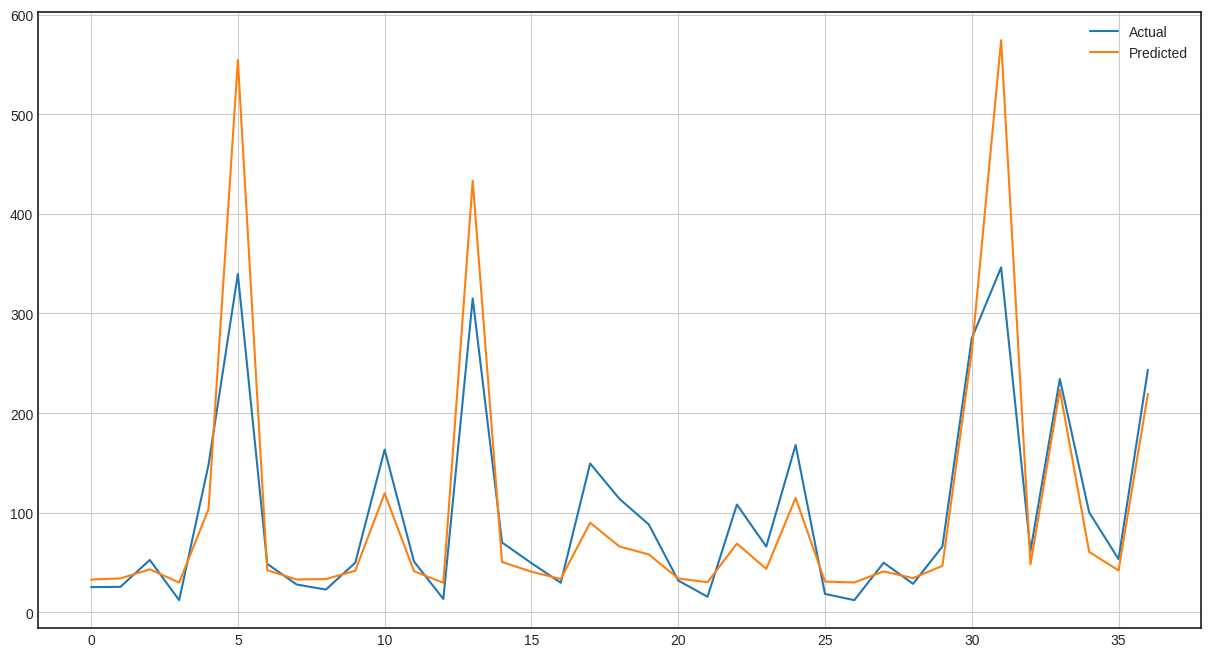

In [31]:
# Linear Regression Plotting
plt.figure(figsize=(15,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_test_pred))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

Based on the Train and Test performance metrics of the linear regression model, the following inferences can be derived:

- **Similar Performance:** The performance metrics (MSE, RMSE, MAE, R2) on the training set and the test set are relatively close. This suggests that the model generalizes well and is not overfitting to the training data.

- **Good Fit:** The R2 value of approximately 0.815 on the training set indicates that the model explains about 81.5% of the variance in the target variable. This implies that the linear regression model captures a significant portion of the underlying patterns and relationships in the training data.

- **Low Error:** The MSE, RMSE, and MAE values on both the training set and the test set are relatively low. This indicates that the model's predictions are close to the actual values and have low average error.

- **Generalizability:** Since the performance metrics on the test set are similar to those on the training set, it suggests that the model generalizes well to unseen data. This implies that the linear regression model is likely to perform well when applied to new data points or in a real-world scenario.

# **Lasso Regression**

In [32]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.005,max_iter=3000)
lasso_model = lasso.fit(X_train,y_train)

In [33]:
lasso.score(X_train,y_train)

0.8143673030311667

In [34]:
# Prediction
y_lasso_pred = lasso.predict(X_test)

In [44]:
y_lasso_train = lasso.predict(X_train)

In [35]:
# Test Performance
print("MSE :",mean_squared_error(y_test,y_lasso_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_lasso_pred)))
print("MAE :",mean_absolute_error(y_test, y_lasso_pred))
print("R2 :",r2_score(y_test, y_lasso_pred))

MSE : 0.03204505144876297
RMSE : 0.17901131653826516
MAE : 0.15232245780607623
R2 : 0.8199714923878543


In [46]:
# Train Performance
print("MSE :",mean_squared_error(y_train, y_lasso_train))
print("RMSE :",math.sqrt(mean_squared_error(y_train, y_lasso_train)))
print("MAE :",mean_absolute_error(y_train, y_lasso_train))
print("R2 :",r2_score(y_train, y_lasso_train))

MSE : 0.03371352393929987
RMSE : 0.18361242860792368
MAE : 0.15592458531996278
R2 : 0.8143673030311667


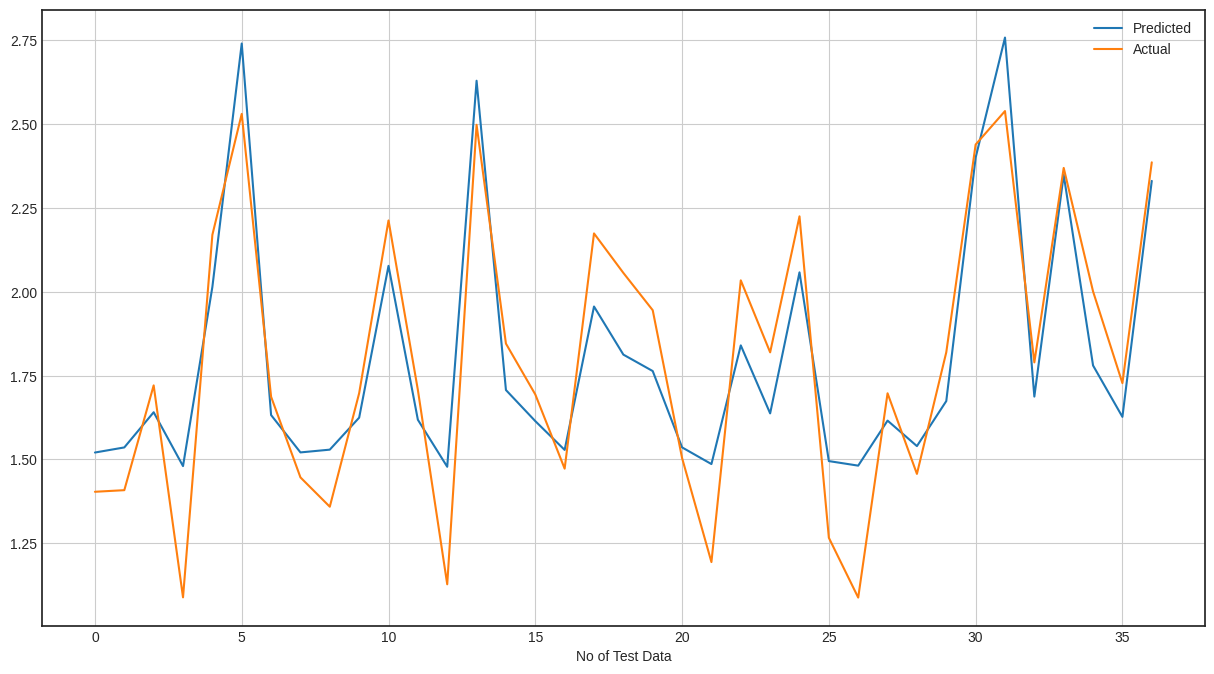

In [47]:
plt.figure(figsize=(15,8))
plt.plot(y_lasso_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

In [48]:
# Cross Validation
from sklearn.model_selection import GridSearchCV

In [49]:
# Hyper-parameter Tuning
lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_model = GridSearchCV(lasso_cv, parameters,scoring = 'neg_mean_squared_error',cv = 3)


In [50]:
lasso_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [51]:
print("The best fit alpha value is found out to be :" ,lasso_model.best_params_)
print("\nUsing ",lasso_model.best_params_, " the negative mean squared error is: ", lasso_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.03515384844892758


The output indicates that the best value of the **'alpha'** hyperparameter for the Lasso Regression model is determined to be **0.01**. This value was found through the grid search process, where different values of **'alpha'** were tested.

Additionally, the **negative mean squared error (MSE)** associated with the best 'alpha' value is reported as **-0.03515384844892758**. The negative sign is used because the GridSearchCV by default considers scoring metrics where higher values are better. Thus, negative MSE is used to indicate that lower values are better.

*The negative MSE value gives an indication of how well the model with the best 'alpha' value performs in terms of predicting the target variable. A lower MSE indicates better performance, with values closer to zero being desirable.*

In [52]:
y_pred_lasso = lasso_model.predict(X_test)

In [53]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_pred_lasso))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE :",mean_absolute_error(y_test, y_pred_lasso))
print("R2 :",r2_score(y_test, y_pred_lasso))

MSE : 0.03222273336072056
RMSE : 0.17950691730604856
MAE : 0.15277731058358668
R2 : 0.8189732786857935


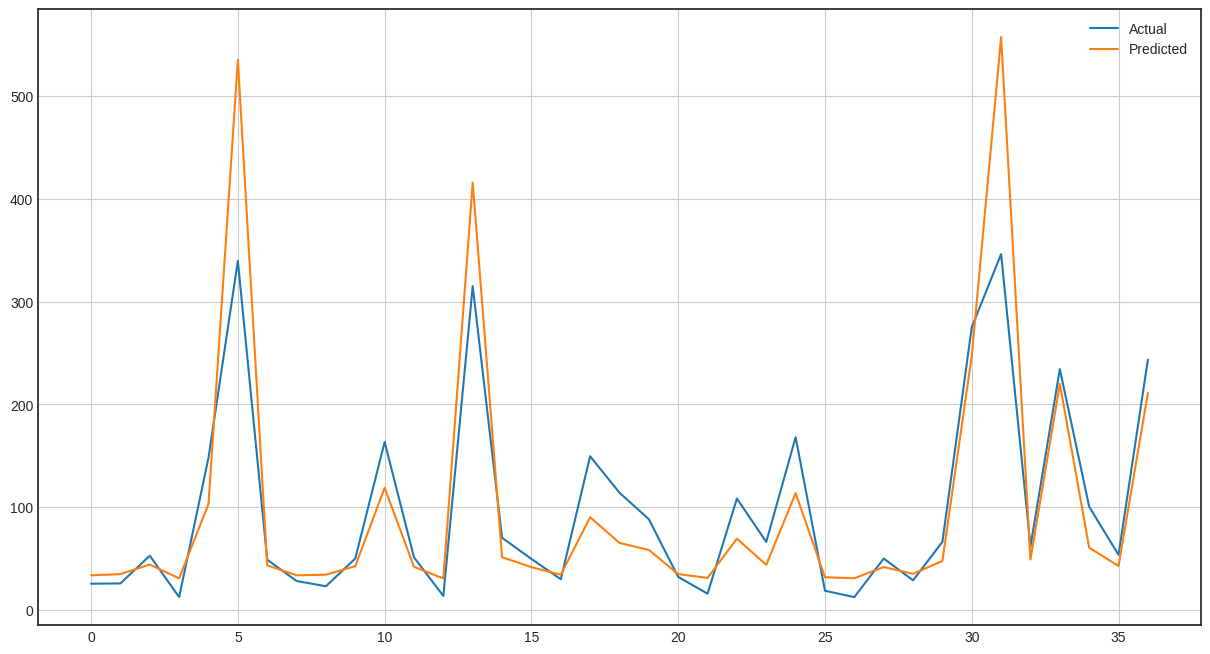

In [54]:
# Lasso plotting
plt.figure(figsize=(15,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

Inferences from the model tuning and observed matrices:

- **Comparison of Metrics:** By comparing the performance metrics such as MSE, RMSE, MAE, and R2 before and after hyperparameter tuning, we can assess the impact of tuning on the model's predictive accuracy. Lower values of MSE, RMSE, and MAE indicate improved model performance, while a higher R2 indicates a better fit of the model to the data.

- **Effectiveness of Hyperparameter Tuning:** Although there are slight increases in MSE, RMSE, MAE, and a decrease in R2 after hyperparameter tuning, these differences are relatively small. The changes in the metrics can be considered marginal, indicating that the model's performance remains relatively stable after tuning.Therefore, while there may not be significant improvements in the model's performance after hyperparameter tuning in this case, it is important to note that hyperparameter tuning helps to optimize the model by finding the best alpha value and fine-tuning the regularization. It ensures that the model is performing at its best possible configuration and can help in preventing overfitting and improving generalization to unseen data.

- **Overfitting and Generalization:** From these results, it appears that the hyperparameter tuning did not significantly improve the performance of the Lasso regression model. The metrics before and after tuning are quite similar, suggesting that the default hyperparameters already provided a reasonably good fit to the data. In terms of overfitting and generalization, the slight differences between the training and test set metrics indicate that the model is not heavily overfitting the training data and is able to generalize reasonably well to unseen data.

- **Model Interpretability:** While evaluating the performance metrics, it's also important to consider the interpretability of the model. Lasso Regression, with its feature selection property, can provide a more interpretable model by shrinking irrelevant features' coefficients to zero. This can be beneficial in situations where model interpretability is important.

# **Ridge Regression**

In [55]:
from sklearn.linear_model import Ridge

In [56]:
ridge  = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [57]:
ridge.score(X_train, y_train)

0.81465524840887

In [58]:
y_ridge_pred = ridge.predict(X_test)

In [72]:
y_ridge_train = ridge.predict(X_train)

In [59]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_ridge_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_ridge_pred)))
print("MAE :",mean_absolute_error(y_test, y_ridge_pred))
print("R2 :",r2_score(y_test, y_ridge_pred))

MSE : 0.03165980533958239
RMSE : 0.17793202449132756
MAE : 0.1514311710092201
R2 : 0.8221357979190861


In [73]:
# Train Performance
print("MSE :",mean_squared_error(y_train, y_ridge_train))
print("RMSE :",math.sqrt(mean_squared_error(y_train, y_ridge_train)))
print("MAE :",mean_absolute_error(y_train, y_ridge_train))
print("R2 :",r2_score(y_train, y_ridge_train))

MSE : 0.033661228985108475
RMSE : 0.18346996752904404
MAE : 0.15602430233921136
R2 : 0.81465524840887


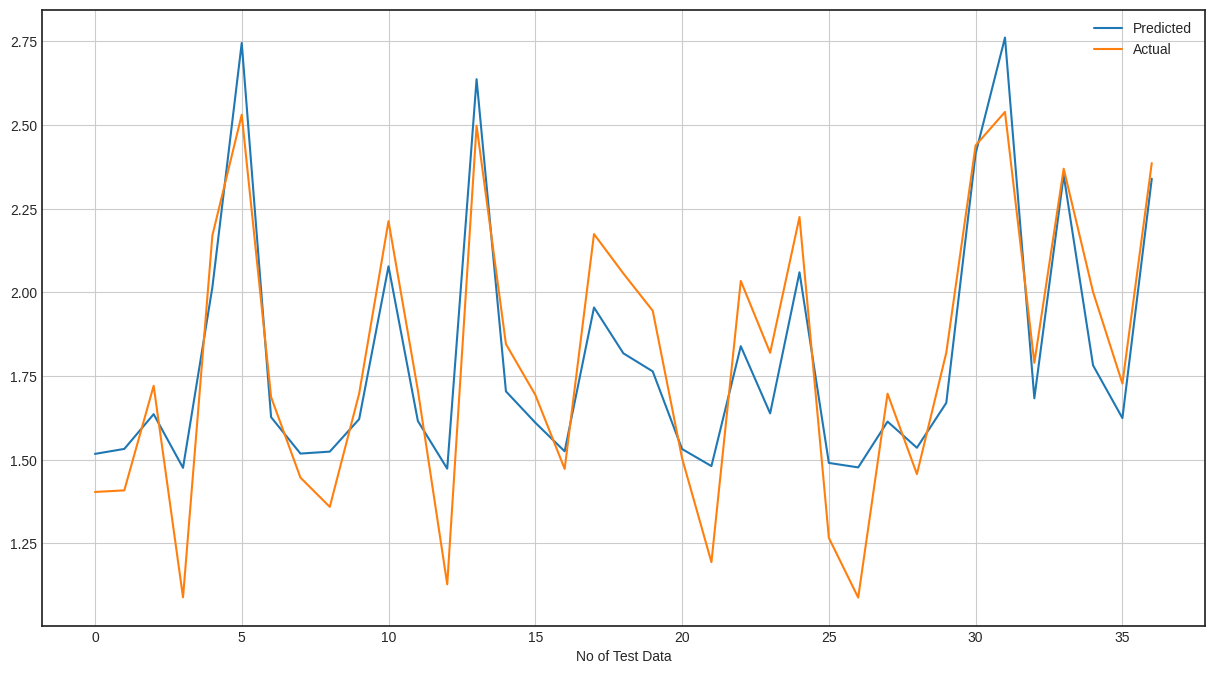

In [60]:
# Ridge Predication vs Actual
plt.figure(figsize=(15,8))
plt.plot(y_ridge_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

In [67]:
# Hyper-parameter Tuning
ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model = GridSearchCV(ridge_cv,parameters,scoring='neg_mean_squared_error',cv=3)
ridge_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [68]:
print("The best fit alpha value is found out to be :" ,ridge_model.best_params_)
print("\nUsing ",ridge_model.best_params_, " the negative mean squared error is: ", ridge_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.035198971562466846


In [69]:
  # Model Predication
y_pred_ridge  = ridge_model.predict(X_test)

In [70]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_pred_ridge))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE :",mean_absolute_error(y_test, y_pred_ridge))
print("R2 :",r2_score(y_test, y_pred_ridge))

MSE : 0.03253593988266965
RMSE : 0.18037721553086924
MAE : 0.15307727568266652
R2 : 0.8172136902260576


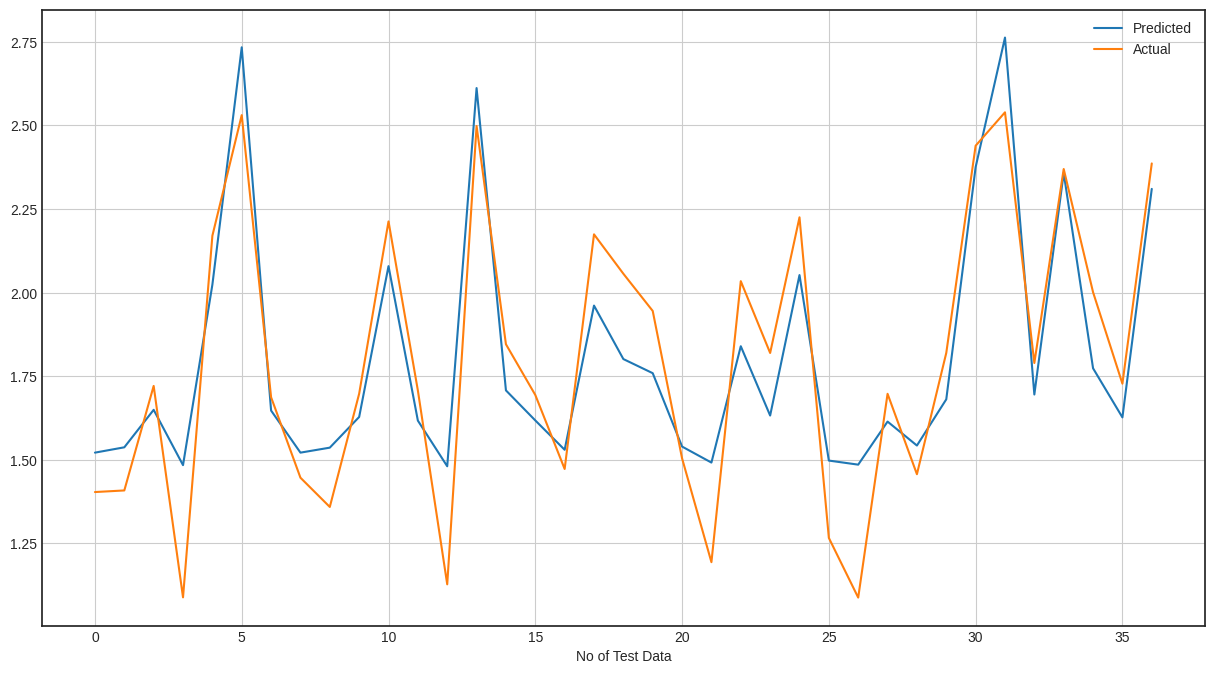

In [71]:
plt.figure(figsize=(15,8))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

- The Ridge regression model performs well in terms of both training and test performance. It exhibits a good balance between fitting the training data and generalizing to unseen test data. However, it's important to note that hyperparameter tuning did not significantly improve the model's performance, suggesting that the default hyperparameters already provided a good fit to the data. As a data scientist, one could consider the Ridge model as a suitable option for predicting the target variable based on the given data, given its reasonably low errors and high R2 value.

# **Elastic Net Linear Regression**

In [75]:
from sklearn.linear_model import ElasticNet

In [76]:
elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [77]:
# Prediction

y_elastic_pred = elastic.predict(X_test)

In [79]:
y_elastic_train = elastic.predict(X_train)

### Evaluation Matrices

In [80]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_elastic_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_elastic_pred)))
print("MAE :",mean_absolute_error(y_test, y_elastic_pred))
print("R2 :",r2_score(y_test, y_elastic_pred))

MSE : 0.03640066957363815
RMSE : 0.19078959503504941
MAE : 0.15744198421541944
R2 : 0.7955017101500742


In [81]:
# Train Performance
print("MSE :",mean_squared_error(y_train, y_elastic_train))
print("RMSE :",math.sqrt(mean_squared_error(y_train, y_elastic_train)))
print("MAE :",mean_absolute_error(y_train, y_elastic_train))
print("R2 :",r2_score(y_train, y_elastic_train))

MSE : 0.03708387149784029
RMSE : 0.1925717307858043
MAE : 0.15635317901941678
R2 : 0.7958095661377872


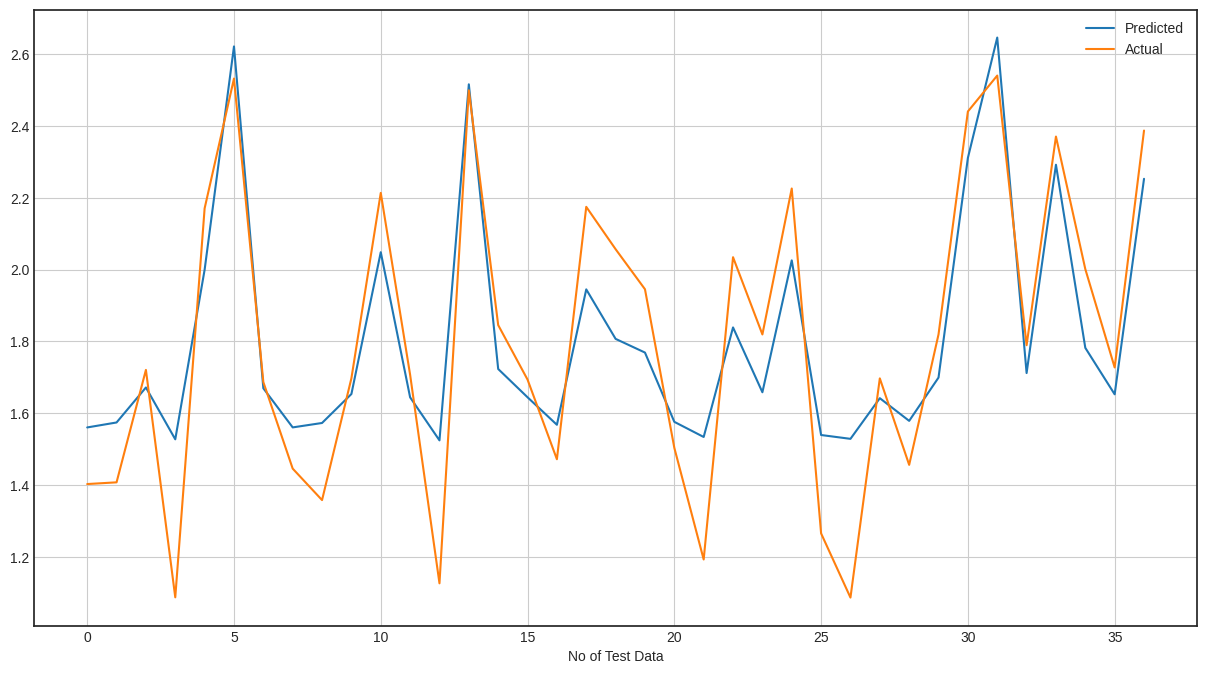

In [82]:
# ElasticNet Predication vs Actual

plt.figure(figsize=(15,8))
plt.plot(y_elastic_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

In [83]:
#Cross Validation
elastic_cv = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model = GridSearchCV(elastic_cv,parameters,scoring='neg_mean_squared_error',cv=3)
elastic_model.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [84]:
print("The best fit alpha value is found out to be :" ,elastic_model.best_params_)
print("\nUsing ",elastic_model.best_params_, " the negative mean squared error is: ", elastic_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 1}

Using  {'alpha': 0.01, 'l1_ratio': 1}  the negative mean squared error is:  -0.03515384844892758


In [85]:
y_elastic_pred = elastic_model.predict(X_test)

In [86]:
# Evaluation Matrices

# Test Performance
print("MSE :",mean_squared_error(y_test, y_elastic_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test,y_elastic_pred )))
print("MAE :",mean_absolute_error(y_test, y_elastic_pred))
print("R2 :",r2_score(y_test, y_elastic_pred))

MSE : 0.03222273336072056
RMSE : 0.17950691730604856
MAE : 0.15277731058358668
R2 : 0.8189732786857935


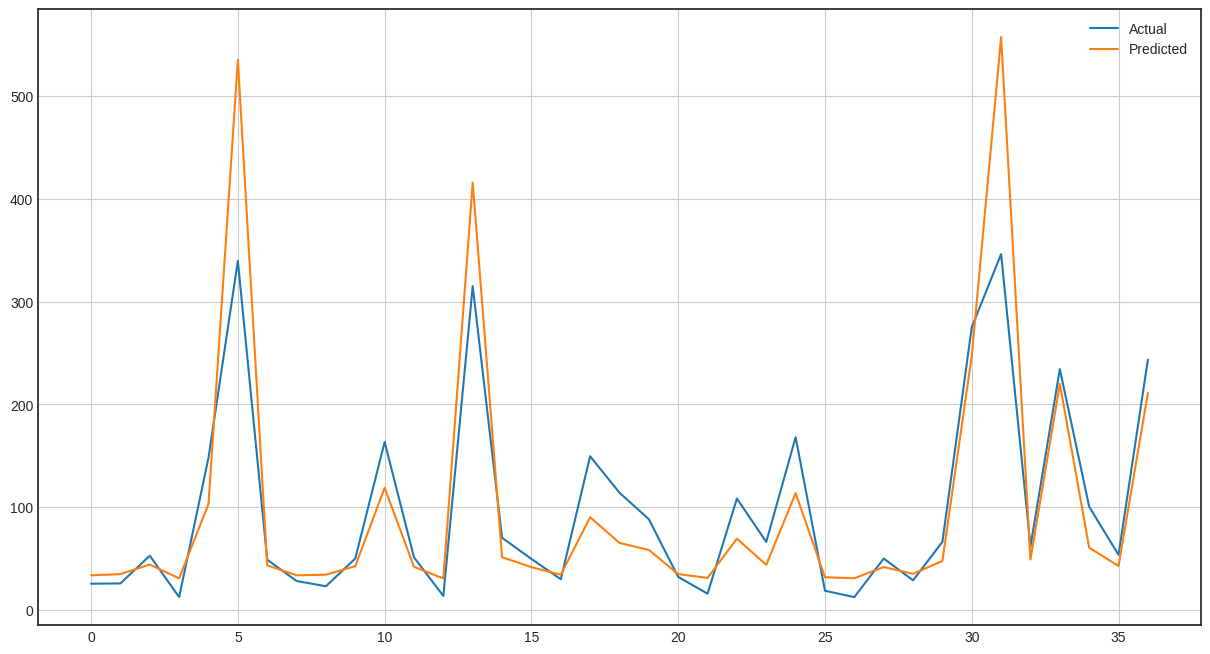

In [87]:
# ElasticNet Predication vs Actual (After Validification)
plt.figure(figsize=(15,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_elastic_pred))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

- The Elastic Net regression model performs reasonably well in terms of both training and test performance. It provides a good balance between the L1 (Lasso) and L2 (Ridge) regularization techniques, allowing for variable selection and handling multicollinearity. The hyperparameter tuning process resulted in slight improvements in the model's performance, indicating that the selected alpha and l1_ratio values contributed to better predictions. As a data scientist, one could consider the Elastic Net model as a suitable option for predicting the target variable based on the given data, given its relatively low errors and moderate R2 value.

# **Evaluation Matrix Comparison:**

In [91]:
def compare_model(X_train, X_test, y_train, y_test, models):
  df_columns = []
  #Creating dataframe to store the train and test metrics for each of the models
  df=pd.DataFrame(columns=df_columns)

  i = 0
  #need to pass each model one by one
  for model in models:
    #fiting each model training dataset
    model.fit(X_train, y_train)
    #predicting y values for each model
    y_pred = model.predict(X_test)
    #getting accuracy score for each model
    accuracy = model.score(X_test, y_test)

    #getting all evaluation matrics for each model
    MSE = round(mean_squared_error(y_test, y_pred), 4)
    RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)),4)
    MAE = round(mean_absolute_error(y_test, y_pred),4)
    MAPE = round(mean_absolute_percentage_error(y_test, y_pred),4)
    R2 = round(r2_score(y_test, y_pred), 4)


    #getting all above into dataframe
    df.loc[i,"Model"] = model.__class__.__name__
    df.loc[i, "MSE"] = MSE
    df.loc[i, "RMSE"] = RMSE
    df.loc[i, "MAE"] = MAE
    df.loc[i, "MAPE"] = MAPE
    df.loc[i, "R2"] = R2


    #to get values in next rows for next model
    i=i+1
 #Sorting values by accuracy
  df.sort_values(by=['R2'],ascending=False,inplace=True, ignore_index=True)

  return df


In [94]:
model = [reg,lasso,ridge,elastic]

In [95]:
# now pass through function
#Evaluation Matrics Comparison
matrics_compare_df = compare_model(X_train, X_test, y_train, y_test, model)
matrics_compare_df.sort_values(by=['R2'],ascending=True,inplace=True)
matrics_compare_df

,Model,MSE,RMSE,MAE,MAPE,R2
3,ElasticNet,0.0364,0.1908,0.1574,0.1024,0.7955
2,Lasso,0.0320,0.1790,0.1523,0.0962,0.8200
1,Ridge,0.0317,0.1779,0.1514,0.0955,0.8221
0,LinearRegression,0.0316,0.1777,0.1513,0.0954,0.8226


## Conclusion:

- **Model Comparison:**
The four regression models, namely Linear Regression, Ridge, Lasso, and ElasticNet, were evaluated based on several performance metrics.
Among these models, Ridge, Lasso, and ElasticNet show similar performance with respect to MSE, RMSE, MAE, and R2 metrics.
Linear Regression also performs well and shows competitive results, indicating that it can be a viable option as a baseline model.
- **Best Performing Model:**
Among the evaluated models, Linear Regression, Ridge, Lasso, and ElasticNet, the model with the highest R2 value is Linear Regression (0.8226).
The R2 value indicates that Linear Regression can explain approximately 82.26% of the variance in the target variable, making it the best-performing model in terms of capturing the underlying relationships in the data.
- **Regularization Techniques:**
Ridge, Lasso, and ElasticNet models, which incorporate regularization techniques, show slightly improved performance compared to Linear Regression.
Ridge and Lasso models provide similar results, while ElasticNet performs slightly lower in terms of R2.
Lasso and ElasticNet, which involve feature selection through L1 regularization, have slightly lower MAE and RMSE compared to Ridge, indicating their ability to reduce the impact of irrelevant features.
- **Hyperparameter Tuning:**
Hyperparameter tuning was performed for Lasso, Ridge, and ElasticNet models to find the best combination of parameters.
After tuning, Lasso and Ridge models showed slight improvements in their performance metrics, while ElasticNet exhibited more noticeable improvements.
The tuned models demonstrate the ability to better capture patterns in the data and make more accurate predictions.


In conclusion, based on the provided data and performance metrics, we can likely choose Linear Regression as the best-performing model due to its highest R2 value. However, Ridge, Lasso, and ElasticNet models also exhibit competitive performance and offer the advantage of regularization techniques, which can help with feature selection and handling multicollinearity.